In [57]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adagrad, RMSprop, SGD
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
import gc
tf.keras.backend.clear_session()
gc.collect()

43847

In [59]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() #load
x_train, x_test = x_train/225.0 , x_test/225.0 #rescale

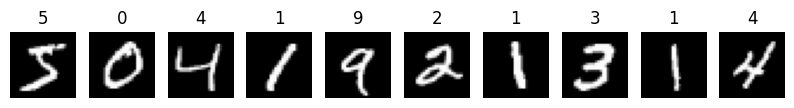

In [60]:
#see the images first 10
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(y_train[i])
    plt.axis("off")
plt.show()

In [61]:
#let's create the model
def build_model(optimizer):
    model = models.Sequential([
        layers.Flatten(input_shape = (28, 28)),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer = optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

optimizers = ['SGD', 'Adam', 'Adagrad', 'RMSprop']
histories={}

In [62]:
for opt in optimizers:
    print(f"\nTraining with {opt.upper()} optimizer.")
    with tf.device('/GPU:0'):
        model = build_model(opt)
        history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)
        histories[opt] = history


Training with SGD optimizer.
Epoch 1/5
844/844 [==============================] - 3s 3ms/step - loss: 0.8351 - accuracy: 0.7952 - val_loss: 0.3999 - val_accuracy: 0.9002
Epoch 2/5
844/844 [==============================] - 2s 2ms/step - loss: 0.4163 - accuracy: 0.8882 - val_loss: 0.3090 - val_accuracy: 0.9158
Epoch 3/5
844/844 [==============================] - 2s 2ms/step - loss: 0.3539 - accuracy: 0.9019 - val_loss: 0.2735 - val_accuracy: 0.9235
Epoch 4/5
844/844 [==============================] - 2s 2ms/step - loss: 0.3218 - accuracy: 0.9103 - val_loss: 0.2518 - val_accuracy: 0.9287
Epoch 5/5
844/844 [==============================] - 2s 2ms/step - loss: 0.2994 - accuracy: 0.9158 - val_loss: 0.2367 - val_accuracy: 0.9320

Training with ADAM optimizer.
Epoch 1/5
844/844 [==============================] - 2s 2ms/step - loss: 0.3068 - accuracy: 0.9134 - val_loss: 0.1417 - val_accuracy: 0.9615
Epoch 2/5
844/844 [==============================] - 2s 2ms/step - loss: 0.1405 - accuracy: 0

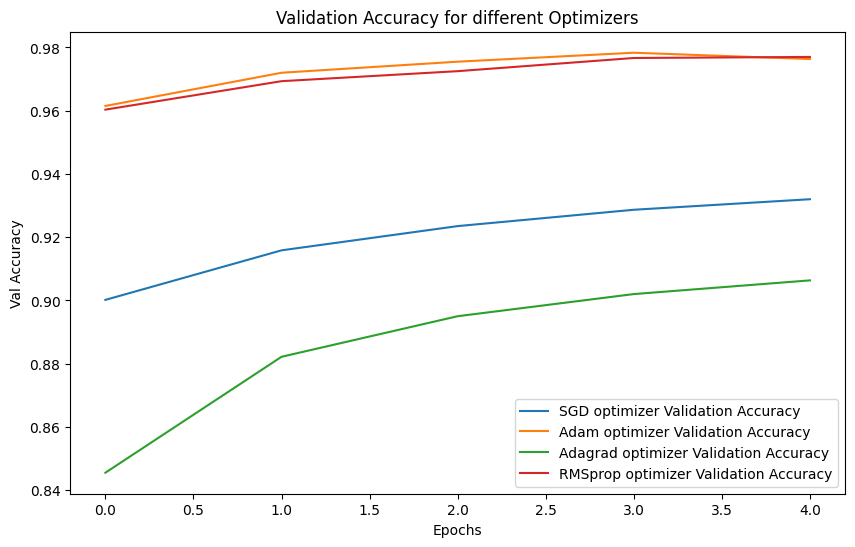

In [63]:
#figure of different optimizers working
plt.figure(figsize=(10, 6))
for opt in optimizers:
    plt.plot(histories[opt].history['val_accuracy'], label=f"{opt} optimizer Validation Accuracy")
plt.title("Validation Accuracy for different Optimizers")
plt.xlabel("Epochs")
plt.ylabel("Val Accuracy")
plt.legend()
plt.show()    

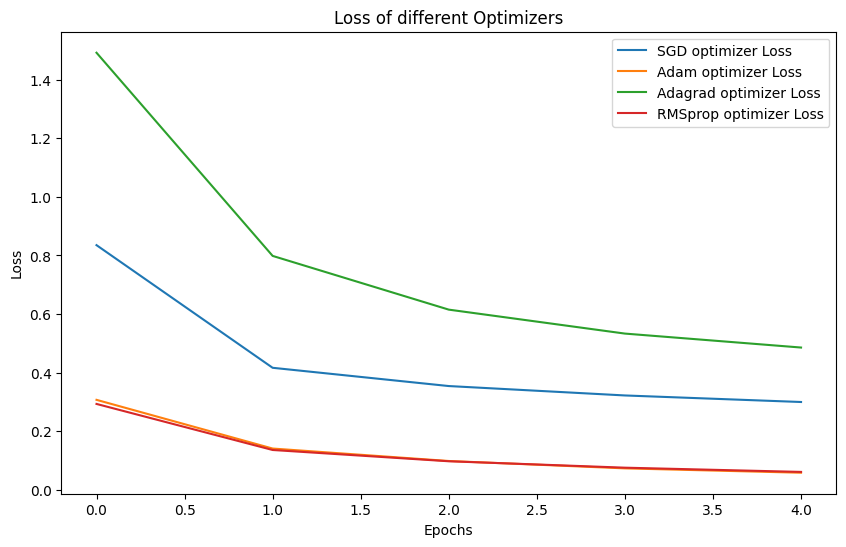

In [64]:
#figure of different loss of optimizers
plt.figure(figsize=(10, 6))
for opt in optimizers:
    plt.plot(histories[opt].history['loss'], label=f"{opt} optimizer Loss")
plt.title("Loss of different Optimizers")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()  

In [65]:
#tabulating all
for opt in optimizers:
    val_accuracy = histories[opt].history['val_accuracy'][-1]
    loss = histories[opt].history['loss'][-1]
    print(f"{opt.upper():<8} → Val Accuracy: {val_accuracy:.4f}, Val Loss: {loss:.4f}")

SGD      → Val Accuracy: 0.9320, Val Loss: 0.2994
ADAM     → Val Accuracy: 0.9763, Val Loss: 0.0580
ADAGRAD  → Val Accuracy: 0.9063, Val Loss: 0.4854
RMSPROP  → Val Accuracy: 0.9770, Val Loss: 0.0608
